In [35]:
%matplotlib inline
\
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [36]:
from torchvision import datasets

cifar10 = datasets.CIFAR10('data', train=True, download=True)
cifar10_val = datasets.CIFAR10('data', train=False, download=True)

# #####另一種方法
# cifar10 = datasets.CIFAR10('data', train=True, download=False,
#                           transform=transforms.Compose([
#                               transforms.ToTensor(),
#                               transforms.Normalize((0.4915, 0.4823, 0.4468),
#                                                    (0.2470, 0.2435, 0.2616))
#                           ]))
# cifar10_val = datasets.CIFAR10('data', train=False, download=False,
#                           transform=transforms.Compose([
#                               transforms.ToTensor(),
#                               transforms.Normalize((0.4915, 0.4823, 0.4468),
#                                                    (0.2470, 0.2435, 0.2616))
#                           ]))

Files already downloaded and verified
Files already downloaded and verified


In [38]:
#######或者
import torchvision
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## 查看圖片

In [39]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [ ]:
# from PIL import Image
# img = Image.open("../data/p1ch2/bobby.jpg")

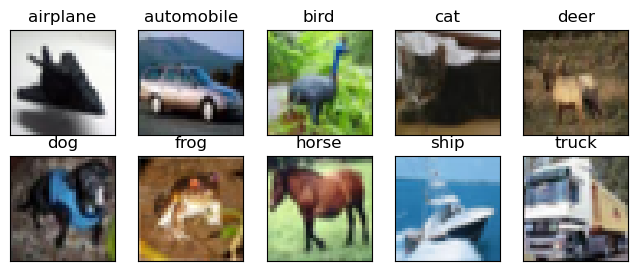

In [40]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)     #next讓每個類別的圖片顯示一次
    plt.imshow(img)
plt.show()

In [41]:
from torchvision import transforms

to_tensor = transforms.ToTensor()     #ToTensor()   把圖片數據轉化爲tensor數據

img, label = cifar10[99]

img_t = to_tensor(img)

print(img_t.shape)

img_t.min(), img_t.max()

# imgs = torch.stack([img for img, _ in cifar10], dim=3)
# imgs.shape


torch.Size([3, 32, 32])


(tensor(0.), tensor(1.))

In [42]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [43]:
import torch.optim as optim
##我们使用交叉熵作为损失函数，使用带动量的随机梯度下降。
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [44]:
for epoch in range(2):  # 多批次循环

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入
        inputs, labels = data

        # 梯度置0
        optimizer.zero_grad()

        # 正向传播，反向传播，优化
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印状态信息
        running_loss += loss.item()
        if i % 2000 == 1999:    # 每2000批次打印一次
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.189
[1,  4000] loss: 1.867
[1,  6000] loss: 1.670
[1,  8000] loss: 1.556
[1, 10000] loss: 1.488
[1, 12000] loss: 1.438
[2,  2000] loss: 1.374
[2,  4000] loss: 1.367
[2,  6000] loss: 1.350
[2,  8000] loss: 1.319
[2, 10000] loss: 1.279
[2, 12000] loss: 1.269
Finished Training


GroundTruth:    cat  ship  ship plane


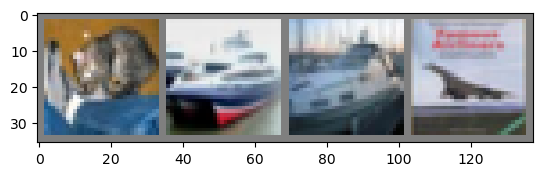

In [48]:
dataiter = iter(testloader)
images, labels = next(dataiter)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# 显示图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [49]:
#看看神经网络认为以上图片是什么。
outputs = net(images)

In [50]:
#输出是10个标签的能量。 一个类别的能量越大，神经网络越认为它是这个类别。所以让我们得到最高能量的标签。
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


In [51]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))




Accuracy of the network on the 10000 test images: 55 %


### 随机选择的正确率为10%。 似乎网络学习到了一些东西。在识别哪一个类的时候好，哪一个不好呢？

In [52]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 68 %
Accuracy of  bird : 52 %
Accuracy of   cat : 26 %
Accuracy of  deer : 40 %
Accuracy of   dog : 44 %
Accuracy of  frog : 51 %
Accuracy of horse : 65 %
Accuracy of  ship : 71 %
Accuracy of truck : 66 %


In [33]:
from torchvision import transforms
dir(transforms)
"""

pytorch torchvision transform
对PIL.Image进行变换
class torchvision.transforms.Compose(transforms)
将多个transform组合起来使用。

例子：

transforms.Compose([
     transforms.CenterCrop(10),
     transforms.ToTensor(),
 ])
 
 
class torchvision.transforms.        Scale(size, interpolation=2)

重新改变大小成给定的`size`，`size`是最小边的边长。举个例子，如果原图的`height>width`,那么改变大小后的图片大小是`(size*height/width, size)`。

from PIL import Image
crop = transforms.Scale(12)
croped_img=crop(img)

class torchvision.transforms.     CenterCrop(size)
将给定的PIL.Image进行中心切割，得到给定的size，size可以是tuple，(target_height, target_width)。
size也可以是一个Integer，在这种情况下，切出来的图片的形状是正方形。

class torchvision.transforms.      RandomCrop(size, padding=0)
切割中心点的位置随机选取。size可以是tuple也可以是Integer。

class torchvision.transforms.     RandomHorizontalFlip
随机水平翻转给定的PIL.Image,概率为0.5。即：一半的概率翻转，一半的概率不翻转。

class torchvision.transforms.      RandomSizedCrop(size, interpolation=2)
先将给定的PIL.Image随机切，然后再resize成给定的size大小。

class torchvision.transforms.Pad(padding, fill=0)
将给定的PIL.Image的所有边用给定的pad value填充。 padding：要填充多少像素 fill：用什么值填充 例子：

from torchvision import transforms
from PIL import Image
padding_img = transforms.Pad(padding=10, fill=0)
img = Image.open('test.jpg')

print(type(img))
print(img.size)

padded_img=padding(img)
print(type(padded_img))
print(padded_img.size)
<class 'PIL.PngImagePlugin.PngImageFile'>
(10, 10)
<class 'PIL.Image.Image'>
(30, 30) #由于上下左右都要填充10个像素，所以填充后的size是(30,30)

对Tensor进行变换
class torchvision.transforms.Normalize(mean, std)
给定均值：(R,G,B) 方差：（R，G，B），将会把Tensor正则化。即：Normalized_image=(image-mean)/std。

Conversion Transforms
class torchvision.transforms.ToTensor
把一个取值范围是[0,255]的PIL.Image或者shape为(H,W,C)的numpy.ndarray，转换成形状为[C,H,W]，取值范围是[0,1.0]的torch.FloadTensor

data = np.random.randint(0, 255, size=300)
img = data.reshape(10,10,3)
print(img.shape)
img_tensor = transforms.ToTensor()(img) # 转换成tensor
print(img_tensor)
class torchvision.transforms.ToPILImage
将shape为(C,H,W)的Tensor或shape为(H,W,C)的numpy.ndarray转换成PIL.Image，值不变。

通用变换
class torchvision.transforms.Lambda(lambd)
使用lambd作为转换器。

"""
#具体详情见余霆嵩老师的教程，比较全面

"\n\npytorch torchvision transform\n对PIL.Image进行变换\nclass torchvision.transforms.Compose(transforms)\n将多个transform组合起来使用。\n\n例子：\n\ntransforms.Compose([\n     transforms.CenterCrop(10),\n     transforms.ToTensor(),\n ])\n \n \nclass torchvision.transforms.        Scale(size, interpolation=2)\n\n重新改变大小成给定的`size`，`size`是最小边的边长。举个例子，如果原图的`height>width`,那么改变大小后的图片大小是`(size*height/width, size)`。\n\nfrom PIL import Image\ncrop = transforms.Scale(12)\ncroped_img=crop(img)\n\nclass torchvision.transforms.     CenterCrop(size)\n将给定的PIL.Image进行中心切割，得到给定的size，size可以是tuple，(target_height, target_width)。\nsize也可以是一个Integer，在这种情况下，切出来的图片的形状是正方形。\n\nclass torchvision.transforms.      RandomCrop(size, padding=0)\n切割中心点的位置随机选取。size可以是tuple也可以是Integer。\n\nclass torchvision.transforms.     RandomHorizontalFlip\n随机水平翻转给定的PIL.Image,概率为0.5。即：一半的概率翻转，一半的概率不翻转。\n\nclass torchvision.transforms.      RandomSizedCrop(size, interpolation=2)\n先将给定的PIL.Image随机切，然后再resize成给定的size大小。\n\nclass torchvision.transforms.P

### 標簽轉換


In [21]:
# for img, _ in cifar10:
#     print(_)      #0123456789


label_map = {0: 0, 2: 2}
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]


In [27]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])
print(softmax(x))
print(softmax(x).sum())


import torch
import torch.nn as nn
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

### 參數總結

In [32]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

### 在GPU上训练

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

net.to(device)
inputs, labels = inputs.to(device), labels.to(device)


### 展示图像的函数